<a href="https://colab.research.google.com/github/AkshadK7/Multi-Label-Genre-Classification/blob/main/Multi_Label_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© **Copyright 2021** <br>
**Name :** Akshad Kolhatkar

## Importing the Modules

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Dataset : https://drive.google.com/file/d/1iQV5kKF_KGZL9ALx9MMXk_Lg7PklBLCE/view <br>
Research Paper : https://www.cs.ccu.edu.tw/~wtchu/projects/MoviePoster/index.html

In [3]:
#!unzip '/content/Multi_Label_dataset.zip'

## Data Collection

In [4]:
train = pd.read_csv('/content/Multi_Label_dataset/train.csv') # reading the csv file
train.head() # printing first five rows of the file

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
train.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

## Rescaling the Dataset

In [6]:
train_image = []
for i in tqdm(range(train.shape[0])):
    #img = image.load_img('/content/Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(400,400,3))
    img = image.load_img('/content/Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(112,112,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [00:24<00:00, 292.79it/s]


In [7]:
X.shape

(7254, 112, 112, 3)

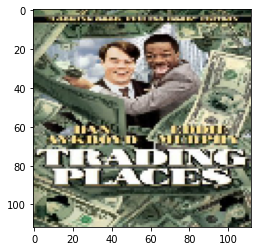

In [8]:
plt.imshow(X[2])

In [9]:
train['Genre'][2]

"['Comedy']"

In [10]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

## Applying the CNN Model

In [11]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [12]:
model = Sequential()
#model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(112,112,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 108, 108, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 54, 54, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 32)        0

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
102/102 [==============================] - 125s 1s/step - loss: 0.3640 - accuracy: 0.1489 - val_loss: 0.2814 - val_accuracy: 0.1970
Epoch 2/10
102/102 [==============================] - 123s 1s/step - loss: 0.2776 - accuracy: 0.2114 - val_loss: 0.2504 - val_accuracy: 0.1970
Epoch 3/10
102/102 [==============================] - 122s 1s/step - loss: 0.2659 - accuracy: 0.2126 - val_loss: 0.2445 - val_accuracy: 0.1970
Epoch 4/10
102/102 [==============================] - 124s 1s/step - loss: 0.2594 - accuracy: 0.2142 - val_loss: 0.2441 - val_accuracy: 0.1970
Epoch 5/10
102/102 [==============================] - 122s 1s/step - loss: 0.2565 - accuracy: 0.2039 - val_loss: 0.2435 - val_accuracy: 0.1970
Epoch 6/10
102/102 [==============================] - 123s 1s/step - loss: 0.2542 - accuracy: 0.2027 - val_loss: 0.2425 - val_accuracy: 0.1970
Epoch 7/10
102/102 [==============================] - 123s 1s/step - loss: 0.2519 - accuracy: 0.2074 - val_loss: 0.2409 - val_accuracy: 0.1970

## Test Predictions

In [16]:
#img = image.load_img('GOT.jpg',target_size=(400,400,3))
img = image.load_img('GOT.jpg',target_size=(112,112,3))
img = image.img_to_array(img)
img = img/255

Drama (0.496)
Action (0.285)
Thriller (0.236)


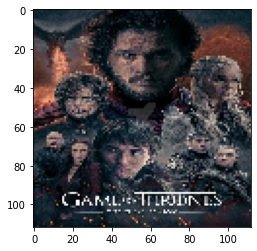

In [18]:
classes = np.array(train.columns[2:])
#proba = model.predict(img.reshape(1,400,400,3))
proba = model.predict(img.reshape(1,112,112,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [19]:
#img = image.load_img('avengers.jpeg',target_size=(400,400,3))
img = image.load_img('Avengers.jpg',target_size=(112,112,3))
img = image.img_to_array(img)
img = img/255

Drama (0.491)
Comedy (0.282)
Action (0.252)


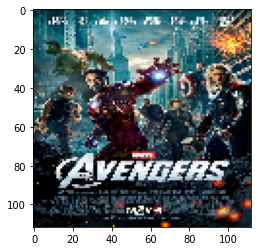

In [20]:
classes = np.array(train.columns[2:])
#proba = model.predict(img.reshape(1,400,400,3))
proba = model.predict(img.reshape(1,112,112,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [21]:
#img = image.load_img('golmaal.jpeg',target_size=(400,400,3))
img = image.load_img('Hangover.jpg',target_size=(112,112,3))
img = image.img_to_array(img)
img = img/255

Drama (0.484)
Comedy (0.429)
Romance (0.22)


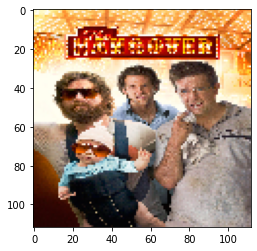

In [22]:
classes = np.array(train.columns[2:])
#proba = model.predict(img.reshape(1,400,400,3))
proba = model.predict(img.reshape(1,112,112,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

## Conclusion

Hence the Multi Label Genre Classification was successfully built with 3 Conv-Net Layers.